In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from pygraphon.graphons.StepGraphon import StepGraphon
import numpy as np
from pygraphon.plots.plot_matrices import spy
import matplotlib.pyplot as plt
from pygraphon.utils.utils_graph import edge_density
from tqdm import tqdm

In [21]:
graphon_matrix = np.array([[0.8,0.4,0.4],[0.4,0.8,0.4],[0.4,0.4,0.8]])
graphon = StepGraphon(graphon_matrix,1/3)

In [22]:
print(graphon.integral(graphon_matrix), graphon.integral())

0.5333333333333333 0.9999999999999999


In [23]:
graphon.graphon

array([[1.5 , 0.75, 0.75],
       [0.75, 1.5 , 0.75],
       [0.75, 0.75, 1.5 ]])

In [24]:
from pygraphon.plots.plot_matrices import spy
import matplotlib.pyplot as plt

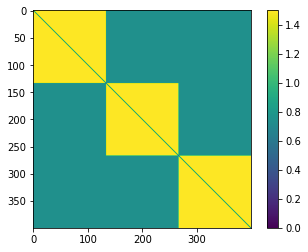

In [25]:
plt.imshow(graphon._get_edge_probabilities(400,False,True))
plt.colorbar()
plt.show()

In [26]:
A = graphon.draw(rho = 0.03,n = 300, exchangeable=False)

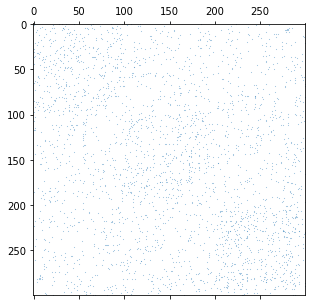

In [27]:
fig, ax = spy(A)
plt.show()

In [28]:
edge_density(A)

0.028361204013377925

In [29]:
print(edge_density(A[0:100,0:100]))
print(edge_density(A[0:100,100:200]))

0.04
0.021212121212121213


In [30]:
from pygraphon.estimators.HistogramEstimator import HistogramEstimator
from pygraphon.estimators.MomentEstimator import MomentEstimator, SimpleMomentEstimator

import matlab.engine
eng = matlab.engine.start_matlab()

In [31]:
hist = HistogramEstimator(eng, bandwithHist= 1/3)
hist_epprox = hist.estimate(adjacency_matrix= A)

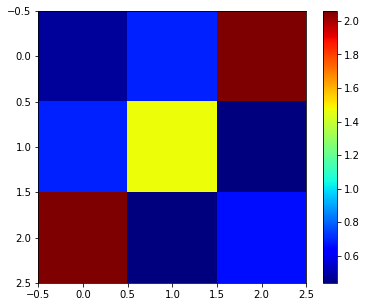

In [32]:
from pygraphon.plots.plots_graphon import plot
plot(hist_epprox)
plt.show()

In [33]:
from pygraphon.subgraph_isomorphism.CycleCount import CycleCount
counter = CycleCount(eng, L = 3)

In [45]:
for rho in tqdm(np.arange(0.01,0.54,0.05)):
    for n in [100,200,400,800]:
        for r in range(10):
            A = graphon.draw(rho = rho,n = n, exchangeable=False)
            count_python = counter.network_profile(adjacency_matrix= A)
            count_matlab = counter(adjacency_matrix= A)
            if not np.allclose(count_python,count_matlab):
                print(count_matlab)
                print(count_python)
                print(np.linalg.norm(count_matlab - count_python))


  9%|▉         | 1/11 [01:12<12:01, 72.18s/it]

In [40]:
d = np.sum(A,axis = 0)
unz = np.nonzero(np.sum(A, axis = 0))[0]

In [41]:
np.sum(A@A@A)

7836991602.0

In [42]:
np.sum(np.diag(A @ A @ A))

16097658.0

In [43]:
plot(mome_simple_approx)
plt.show()

NameError: name 'mome_simple_approx' is not defined

In [ ]:
mome_simple_approx.graphon

In [ ]:
mome_simple_approx.integral()

In [ ]:
mom = MomentEstimator(3,eng)
mom_approx = mom.estimate(adjacency_matrix= A)
plot(mom_approx)
plt.show()

In [ ]:
mom_approx.graphon

In [ ]:
mom_approx.integral()